We first need to read in the data and see how it looks like

In [118]:
# please make sure that the data is located in the data folder under the current sirectory where you put your file

# first we should import all necessary packages
import numpy as np
import pandas as pd
import _pickle as cp

In [119]:
raw = pd.read_csv("./data/peru_for_ml_course.csv")
raw.info() # just to see how many different variables we have 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46305 entries, 0 to 46304
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   23153 non-null  float64
 1   d_fuel_other             46305 non-null  int64  
 2   d_fuel_wood              46305 non-null  int64  
 3   d_fuel_coal              46305 non-null  int64  
 4   d_fuel_kerosene          46305 non-null  int64  
 5   d_fuel_gas               46305 non-null  int64  
 6   d_fuel_electric          46305 non-null  int64  
 7   d_fuel_none              46305 non-null  int64  
 8   d_water_other            46305 non-null  int64  
 9   d_water_river            46305 non-null  int64  
 10  d_water_well             46305 non-null  int64  
 11  d_water_truck            46305 non-null  int64  
 12  d_water_pylon            46305 non-null  int64  
 13  d_water_outside          46305 non-null  int64  
 14  d_water_inside        

In [120]:
raw # in case you want to see all the data

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,...,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,NaN,0,1,1,233710511,5.246471,284.4243
1,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,0,3,2,295508011,6.129468,522.8840
2,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,0,4,3,257600211,6.665577,878.4961
3,NaN,0,0,0,0,1,0,0,0,0,...,0,0,0,NaN,1,9,4,198104311,6.088295,567.4705
4,NaN,0,1,0,0,0,0,0,0,1,...,0,0,0,NaN,1,8,5,24805311,5.008170,115.4929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46300,6.146313,0,0,0,0,1,0,0,0,0,...,0,0,1,466.9923,0,7,46301,199903811,6.099830,520.8622
46301,5.530832,0,1,0,0,0,0,0,0,0,...,0,0,1,252.3537,0,4,46302,52806611,5.484914,266.1815
46302,5.965293,0,0,0,0,1,0,0,0,0,...,0,0,1,389.6673,0,7,46303,5900111,5.967220,395.6915
46303,4.736676,0,1,0,0,0,0,0,0,0,...,0,0,1,114.0545,1,4,46304,360704611,5.558093,331.6651


### As in the paper we should first randomly divide the observations into equally sized training and data sets


In [121]:
np.random.seed(1234) # as far as I undertand so that the results are exactly the same for everyone we set
# the speudo-random seed generator

In [123]:
# set X as exogenous variable and y as endogenous
additional = ['training', 'percapitaconsumption', 'poor', 'h_hhsize',
       'id_for_matlab', 'hhid', 'lncaphat_OLS', 'percapitahat_OLS']
exogenous_data = ['d_fuel_other', 'd_fuel_wood', 'd_fuel_coal',
       'd_fuel_kerosene', 'd_fuel_gas', 'd_fuel_electric', 'd_fuel_none',
       'd_water_other', 'd_water_river', 'd_water_well', 'd_water_truck',
       'd_water_pylon', 'd_water_outside', 'd_water_inside', 'd_drain_none',
       'd_drain_river', 'd_drain_cesspool', 'd_drain_septic',
       'd_drain_outside', 'd_drain_inside', 'd_wall_other', 'd_wall_woodmat',
       'd_wall_stonemud', 'd_wall_quincha', 'd_wall_tapia', 'd_wall_adobe',
       'd_wall_stonecement', 'd_wall_brickcement', 'd_roof_other',
       'd_roof_straw', 'd_roof_mat', 'd_roof_platecane', 'd_roof_tile',
       'd_roof_wood', 'd_roof_concrete', 'd_floor_other', 'd_floor_earth',
       'd_floor_cement', 'd_floor_wood', 'd_floor_tile', 'd_floor_sheets',
       'd_floor_parquet', 'd_electricity', 'd_telephone', 'd_h_educ_none',
       'd_h_educ_pre', 'd_h_educ_prim', 'd_h_educ_sec',
       'd_h_educ_higher_nouni', 'd_h_educ_higher_uni', 'd_h_educ_post',
       'd_max_educ_none', 'd_max_educ_prim', 'd_max_educ_sec',
       'd_max_educ_higher_nouni', 'd_max_educ_higher_uni', 'd_insurance_0',
       'd_insurance_1', 'd_insurance_2', 'd_insurance_3', 'd_insurance_4plus',
       'd_crowd_lessthan1', 'd_crowd_1to2', 'd_crowd_2to4', 'd_crowd_4to6',
       'd_crowd_6plus', 'd_lux_0', 'd_lux_1', 'd_lux_2', 'd_lux_3', 'd_lux_4',
       'd_lux_5']

y = raw.lnpercapitaconsumption
X = raw[exogenous_data]

In [124]:
# The function splits the dataset into the training dataset and the test dataset.
# The parameter split_coeff is a percentage value such that
# the first split_coeff of the dataset goes to the training dataset, 
# and the remaining data goes to the test dataset.
def split_data(X, y, split_coeff):
    N, _ = X.shape # get the number of records (rows)
    test_size = int(split_coeff * N) # use the first split_coeff of the data as the test data
    X_test = X[:test_size] # the first training_size records
    y_test = y[:test_size]
    X_train = X[test_size:] # the last test_size records
    y_train = y[test_size:]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data(X, y, 0.5) # use 50% of the data as training data

# check the size of the splitted dataset
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (23153, 72)
Shape of y_train: (23153,)
Shape of X_test: (23152, 72)
Shape of y_test: (23152,)


In [125]:
y_test

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
23147   NaN
23148   NaN
23149   NaN
23150   NaN
23151   NaN
Name: lnpercapitaconsumption, Length: 23152, dtype: float64

In [126]:
data_train = X_train
data_train["lnpercapitaconsumption"] = y_train
data_train
print(' + '.join(exogenous_data))

d_fuel_other + d_fuel_wood + d_fuel_coal + d_fuel_kerosene + d_fuel_gas + d_fuel_electric + d_fuel_none + d_water_other + d_water_river + d_water_well + d_water_truck + d_water_pylon + d_water_outside + d_water_inside + d_drain_none + d_drain_river + d_drain_cesspool + d_drain_septic + d_drain_outside + d_drain_inside + d_wall_other + d_wall_woodmat + d_wall_stonemud + d_wall_quincha + d_wall_tapia + d_wall_adobe + d_wall_stonecement + d_wall_brickcement + d_roof_other + d_roof_straw + d_roof_mat + d_roof_platecane + d_roof_tile + d_roof_wood + d_roof_concrete + d_floor_other + d_floor_earth + d_floor_cement + d_floor_wood + d_floor_tile + d_floor_sheets + d_floor_parquet + d_electricity + d_telephone + d_h_educ_none + d_h_educ_pre + d_h_educ_prim + d_h_educ_sec + d_h_educ_higher_nouni + d_h_educ_higher_uni + d_h_educ_post + d_max_educ_none + d_max_educ_prim + d_max_educ_sec + d_max_educ_higher_nouni + d_max_educ_higher_uni + d_insurance_0 + d_insurance_1 + d_insurance_2 + d_insurance_

<ipython-input-126-2dcadb0b95ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["lnpercapitaconsumption"] = y_train


In [127]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#X_train = sm.add_constant(X_train)

# Compact version with confidence intervals
x = exogenous_data
model = smf.ols("lnpercapitaconsumption ~ d_fuel_other + d_fuel_wood + d_fuel_coal + d_fuel_kerosene + d_fuel_gas + d_fuel_electric + d_fuel_none + d_water_other + d_water_river + d_water_well + d_water_truck + d_water_pylon + d_water_outside + d_water_inside + d_drain_none + d_drain_river + d_drain_cesspool + d_drain_septic + d_drain_outside + d_drain_inside + d_wall_other + d_wall_woodmat + d_wall_stonemud + d_wall_quincha + d_wall_tapia + d_wall_adobe + d_wall_stonecement + d_wall_brickcement + d_roof_other + d_roof_straw + d_roof_mat + d_roof_platecane + d_roof_tile + d_roof_wood + d_roof_concrete + d_floor_other + d_floor_earth + d_floor_cement + d_floor_wood + d_floor_tile + d_floor_sheets + d_floor_parquet + d_electricity + d_telephone + d_h_educ_none + d_h_educ_pre + d_h_educ_prim + d_h_educ_sec + d_h_educ_higher_nouni + d_h_educ_higher_uni + d_h_educ_post + d_max_educ_none + d_max_educ_prim + d_max_educ_sec + d_max_educ_higher_nouni + d_max_educ_higher_uni + d_insurance_0 + d_insurance_1 + d_insurance_2 + d_insurance_3 + d_insurance_4plus + d_crowd_lessthan1 + d_crowd_1to2 + d_crowd_2to4 + d_crowd_4to6 + d_crowd_6plus + d_lux_0 + d_lux_1 + d_lux_2 + d_lux_3 + d_lux_4 + d_lux_5", data_train).fit()
#model.summary().tables[1]
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     lnpercapitaconsumption   R-squared:                       0.656
Model:                                OLS   Adj. R-squared:                  0.655
Method:                     Least Squares   F-statistic:                     683.9
Date:                    Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                            11:18:18   Log-Likelihood:                -13433.
No. Observations:                   22674   AIC:                         2.699e+04
Df Residuals:                       22610   BIC:                         2.751e+04
Df Model:                              63                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

As far as I can see certain coefficient are very close to what they report in the online appendix (please also check some coefficient ). However some of those that they report as negative, we have positive which is quite weird to my opinion

### Step 1 - trying to reporoduce Figure 3 "Predited versus actual per-capita Consumption for Housholds in Test Set Data"

In [128]:
# first we need the predicted values of y_train
y_predicted = model.predict()
y_predicted



array([5.75631266, 6.6001409 , 5.27078838, ..., 5.96722053, 5.55809323,
       6.64436829])

(3.0, 9.0)

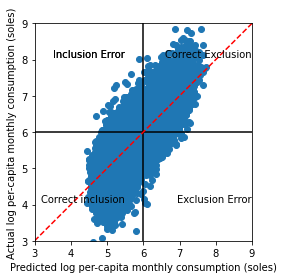

In [129]:
import matplotlib.pyplot as plt

lim_start = 3
lim_end = 9

g=plt.scatter(y_predicted, data_train.dropna(axis=0)["lnpercapitaconsumption"])
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
plt.plot([lim_start, lim_end], [lim_start, lim_end], 'k--', color = 'r')
plt.hlines(6, lim_start, lim_end)
plt.vlines(6, lim_start, lim_end)
g.axes.set_xlabel('Predicted log per-capita monthly consumption (soles)')
g.axes.set_ylabel('Actual log per-capita monthly consumption (soles)')
g.axes.axis('equal')
g.axes.axis('square')
plt.text(5.5, 4, 'Correct inclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5.5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5.5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.text(9, 8, 'Correct Exclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(9, 4, 'Exclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.xlim([lim_start, lim_end])
plt.ylim([lim_start, lim_end])


In [163]:
# calculate inclusion exclusion error
level = 6
input_data = data_train.dropna(axis=0)["lnpercapitaconsumption"].to_frame()
input_data["prediction"] = y_predicted

actual_threshold = (input_data["lnpercapitaconsumption"] > level)
predicted_threshold = (y_predicted < level)
z = np.logical_and(actual_threshold,predicted_threshold)
len(z[z == True]) / len(data_train.dropna(axis=0)["lnpercapitaconsumption"])

0.08922113433889035

In [130]:
y = data_train.dropna(axis=0)["lnpercapitaconsumption"].to_frame() 

In [131]:
len(y)

22674

In [149]:
predicted_threshold = np.zeros(len(y))

In [161]:
# lets make a function to calculate inclusion/exclusion error and correct inclusion/exlusion

def inex(predicted, actual, level, incl: bool, err: bool):
     
    #the funciton takes in 5 values and returns one value
    #predicted - should be an array of predicted y values according to the model that you used
    #actual - actual values of a training or testing data set, as a dataframe with an index
    #level - scalar which is used to determining the threshold 
    
    predicted_threshold = np.zeros(len(y))
    
    if incl is True:
        predicted_threshold = (predicted < level)
    else:
        predicted_threshold = (predicted > level)
    
    actual_threshold = np.zeros(len(y))
    
    if err is True:
        actual_threshold = (actual > level)
    else:
        actual_threshold = (actual < level)
    
        
    data = pd.DataFrame(index = range(0,len(predicted)), columns = ["actual","predicted"])
    data["actual"] = actual_threshold
    data["predicted"] = predicted_threshold
    
    z = np.logical_and(data["actual"], data["predicted"])
    value = len(z[z == True]) / len(predicted)
    
    return value

In [162]:
inex(y_predicted, y, level = 6, incl = False, err = False) #+ inex(y_predicted , y, level = 6, incl = True, err = True)

0.4306253859045603

In [ ]:
# the funciton seems to be working incorrect, namely it seems not to take into account err = True/False why?????

# We start with traing out some models on the data
We will first make sure again that there are no outliers
We will try out Lasso/ Ridge and afterwards also add k-fold cross validation and do some plotting

In [54]:
# import packages 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [55]:
data_train.isnull().sum().sum() # should be zero

12913

In [56]:
data_train = data_train.dropna(axis = 0)

In [57]:
data_train.isnull().sum().sum().sum()

0

In [58]:
X_train_old = data_train[exogenous_data]
y_train_old = data_train["lnpercapitaconsumption"]

In [59]:
#might be a bit confusing but our training data will be again divided into training and testing data
# so that we can assert some of the hypotheses on the testing data within our big training part

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_old, y_train_old, test_size=0.2, random_state=42)

In [60]:
y_test.to_frame()

,lnpercapitaconsumption
33162,6.217288
45366,5.444049
23679,6.118876
44909,6.420265
23370,6.558080
...,...
41245,4.872386
43731,4.835403
29931,4.943916
30219,6.285006


## Before we start training some models we preallocate some dataframes to put the results there

In [73]:
models = ["OLS", "Lasso", "Ridge", "Basis Expansion", "Lasso + Ridge", "Other"]
results = pd.DataFrame(index = models, columns = ["MSE train", "MSE test", "Inclusion Error", "Exclusion Error", "Alpha Value used"])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Alpha Value used
OLS,NaN,NaN,NaN,NaN,NaN
Lasso,NaN,NaN,NaN,NaN,NaN
Ridge,NaN,NaN,NaN,NaN,NaN
Basis Expansion,NaN,NaN,NaN,NaN,NaN
Lasso + Ridge,NaN,NaN,NaN,NaN,NaN
Other,NaN,NaN,NaN,NaN,NaN


In [65]:
# first just to be sure we will again save the normal linear model 

lin_reg = LinearRegression()
MSEs_lin_reg = cross_val_score(lin_reg, X_train, y_train , scoring = "neg_mean_squared_error", cv = 5)
# The cross_val_score will return an array of MSE for each cross-validation steps.
mean_MSE_lin_reg = np.mean(MSEs_lin_reg)

fit = lin_reg.fit(X_train, y_train)
prediction_train = fit.predict(X_train)
prediction = fit.predict(X_test)
residuals = y_test - prediction
print(mean_MSE_lin_reg)
print(np.mean(residuals**2))

-0.19402361371438792
0.18976312741163737


In [85]:
# insert some vaues to the table
from sklearn.metrics import mean_squared_error

results.iloc[0,0] = mean_squared_error(y_train, prediction_train)
results.iloc[0,1] = mean_squared_error(y_test, prediction)
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Alpha Value used
OLS,0.192085,0.189763,NaN,NaN,NaN
Lasso,NaN,NaN,NaN,NaN,NaN
Ridge,0.192094,0.189865,0,0,0
Basis Expansion,NaN,NaN,NaN,NaN,NaN
Lasso + Ridge,NaN,NaN,NaN,NaN,NaN
Other,NaN,NaN,NaN,NaN,NaN


(3.0, 9.0)

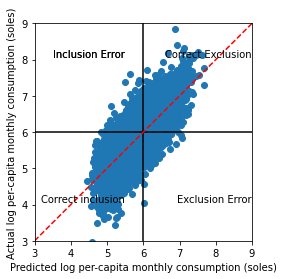

In [228]:
import matplotlib.pyplot as plt

lim_start = 3
lim_end = 9

g=plt.scatter(prediction, y_test)
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
plt.plot([lim_start, lim_end], [lim_start, lim_end], 'k--', color = 'r')
plt.hlines(6, lim_start, lim_end)
plt.vlines(6, lim_start, lim_end)
g.axes.set_xlabel('Predicted log per-capita monthly consumption (soles)')
g.axes.set_ylabel('Actual log per-capita monthly consumption (soles)')
g.axes.axis('equal')
g.axes.axis('square')
plt.text(5.5, 4, 'Correct inclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5.5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5.5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(9, 8, 'Correct Exclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(9, 4, 'Exclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.xlim([lim_start, lim_end])
plt.ylim([lim_start, lim_end])

In [83]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {"alpha" :[ 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20] }
ridge_regressor = GridSearchCV(ridge, parameters,scoring = "neg_mean_squared_error", cv = 5 )
mod = ridge_regressor.fit(X_train, y_train)
pred_train = mod.predict(X_train)
pred_test = mod.predict(X_test)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, pred_test))

{'alpha': 10}
-0.19362585540139293
0.1920943091433739
0.1898650844509743


In [93]:
results.loc["Ridge"] = ([mean_squared_error(y_train, pred_train),mean_squared_error(y_test, pred_test),0,0,10])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Alpha Value used
OLS,0.192085,0.189763,NaN,NaN,NaN
Lasso,0.192127,0.189901,0,0,0.0001
Ridge,0.192094,0.189865,0,0,10
Basis Expansion,NaN,NaN,NaN,NaN,NaN
Lasso + Ridge,NaN,NaN,NaN,NaN,NaN
Other,NaN,NaN,NaN,NaN,NaN


(3.0, 9.0)

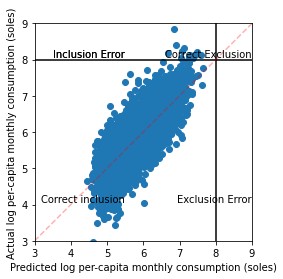

In [292]:
import matplotlib.pyplot as plt

lim_start = 3
lim_end = 9

g=plt.scatter(pred_test, y_test)
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
plt.plot([lim_start, lim_end], [lim_start, lim_end], 'k--', color = 'r', alpha = 0.3)
plt.hlines(6, lim_start, lim_end)
plt.vlines(6, lim_start, lim_end)
g.axes.set_xlabel('Predicted log per-capita monthly consumption (soles)')
g.axes.set_ylabel('Actual log per-capita monthly consumption (soles)')
g.axes.axis('equal')
g.axes.axis('square')
plt.text(5.5, 4, 'Correct inclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5.5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(5.5, 8, 'Inclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.text(9, 8, 'Correct Exclusion',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)
plt.text(9, 4, 'Exclusion Error',
        verticalalignment='bottom', horizontalalignment='right',
        color='black', fontsize=10)

plt.xlim([lim_start, lim_end])
plt.ylim([lim_start, lim_end])


In [296]:
# calculate inclusion exclusion error
level = 6
input_data = y_test.to_frame()
input_data["prediction"] = pred_test
correct_1 = (input_data["lnpercapitaconsumption"] > level)
correct_2 = (input_data["prediction"] < level)
z = np.logical_and(correct_1,correct_2)
len(z[z == True]) / len(pred_test)

0.08599779492833518

In [91]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=0, max_iter=10000)
ridge = Ridge()
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
best_alpha = 0.0001
clf2 = Lasso(best_alpha)
mod = clf2.fit(X_train, y_train)
#scores = clf.cv_results_['mean_test_score']
#scores_std = clf.cv_results_['std_test_score']

print(mean_squared_error(y_train, mod.predict(X_train)))
print(mean_squared_error(y_test, mod.predict(X_test)))

0.1921274499847085
0.1899012682776101


In [92]:
results.loc["Lasso"] = ([mean_squared_error(y_train, mod.predict(X_train)),mean_squared_error(y_test, mod.predict(X_test)),0,0,best_alpha])
results

,MSE train,MSE test,Inclusion Error,Exclusion Error,Alpha Value used
OLS,0.192085,0.189763,NaN,NaN,NaN
Lasso,0.192127,0.189901,0,0,0.0001
Ridge,0.192094,0.189865,0,0,0
Basis Expansion,NaN,NaN,NaN,NaN,NaN
Lasso + Ridge,NaN,NaN,NaN,NaN,NaN
Other,NaN,NaN,NaN,NaN,NaN


(0.0001, 0.31622776601683794)

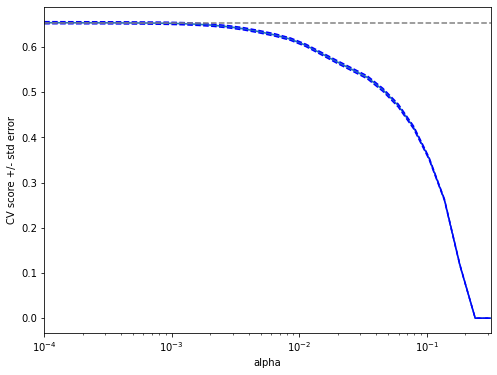

In [122]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [124]:
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 0.0001}
0.653594410216824


Everything after this line is experimental and thus better not to be considered

In [ ]:
# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

ridge = Ridge()

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        #SVC(), 
       ridge, tuned_parameters, scoring = "neg_mean_squared_error" #scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full development set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_train)
    print(classification_report(y_true, y_pred))
    print()



Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



ValueError: Invalid parameter C for estimator Ridge(). Check the list of available parameters with `estimator.get_params().keys()`.

In [179]:
X_train.reset_index(inplace = True)
X_train = X_train[exogenous_data]
#y_train.reset_index(inplace=True)
#y_train

In [181]:

y_train.reset_index()
y_train = y_train["lnpercapitaconsumption"]

KeyError: 'lnpercapitaconsumption'

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:


KeyError: "None of [Int64Index([ 6047,  6048,  6049,  6050,  6051,  6052,  6053,  6054,  6055,\n             6056,\n            ...\n            18129, 18130, 18131, 18132, 18133, 18134, 18135, 18136, 18137,\n            18138],\n           dtype='int64', length=12092)] are in the [columns]"

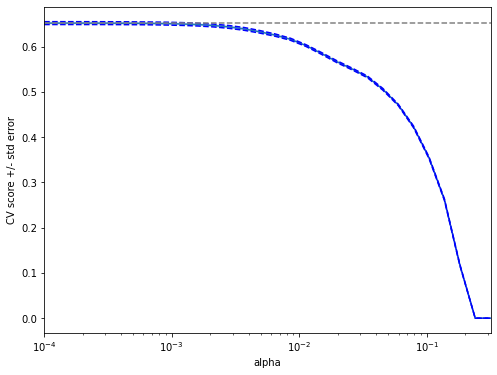

In [148]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# Bonus: how much can you trust the selection of alpha?

# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X_train, y_train)):
    lasso_cv.fit(X_train[train], y_train[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X_train[test], y_train[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

| Model | MSE Train | MSE Test | Inclusion Error | Exclusion Error | alpha value used |
| --- | --- | --- | --- | --- |--- |
| OLS | insert | insert | insert | insert | n.a |
| Lasso | insert | insert | insert | insert | insert |
| Ridge | insert | insert | insert | insert | insert |
| Basis Expansion (Interaction Only) | insert | insert | insert | insert | insert |
| Lasso + Ridge Ensemble | insert | insert | insert | insert | insert |




